# 지도학습 - 회귀

- 회귀모델은 분류모델처럼 출력이 0과 1이 아니라, 연속된 어떤 값이다.

#### ***비지도학습***
- 군집
- 차원 축소

---

- 만약 주택의 넓이와 주택가격이라는 데이터가 있고 가격을 예측한다면?
 1) 학습 데이터셋
 2) 학습 알고리즘
 3) h(가설=모델) 검증

- 선형회귀 : 내가 가지고있는 데이터와 가장 잘 맞는 직선을 찾겠다는 의미

- 그럼 그 직선을 어떻게 찾을까?
    - OLS(Ordinary Linear Least Square): 최소자승법
    - 직선을 찾으려면 1차방정식을 벡터의 행렬로 문제를 정의 할 수 있고 기울기와 y절편 값을 구할 수 있다.
    - ***벡터에 대한 자세한 설명***
    https://velog.io/@yuns_u/%EB%B2%A1%ED%84%B0%EC%99%80-%ED%96%89%EB%A0%AC

- 모델의 성능 표현
    - E = (실제값 - 예측값)^2 + (실제값2 + 예측값2)^2 ....
    - 제곱을 하거나 절댓값을 씌우거나 다양하게 계산가능

---

# OLS 실습

In [2]:
!pip install statsmodels

In [3]:
import pandas as pd

data= {'x' : [1,2,3,4,5],
       'y' : [1,3,4,6,5]}
df = pd.DataFrame(data)
df

,x,y
0,1,1
1,2,3
2,3,4
3,4,6
4,5,5


가설(모델) 세우기

In [4]:
import statsmodels.formula.api as smf

lm_model = smf.ols(formula='y~x', data=df).fit() #y~x는 y=ax + b라는 의미

In [5]:
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

y절편 0.5, 기울기 1.1

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 5.0)

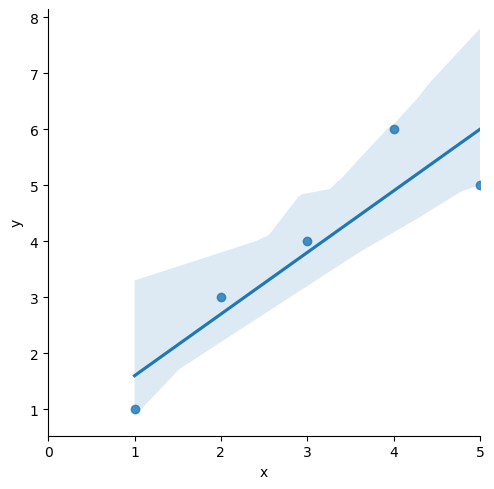

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='x', y='y', data=df);
plt.xlim(0,5)

- 잔차 평가 residue
    - 잔차는 평균이 0인 정규분포를 따라야 함(즉, 데이터가 더 많이 쌓이면 결국 직선에 모인다는 의미)
    - 잔차 평가는 잔차의 평균이 0이고 정규분포를 따르는지 확인

In [8]:
# 잔차확인
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

- 결정계수 R-Squared
    - 분모에는 참값의 평균으로 부터의 오차 제곱의 합
    - 분자에는 예측값의 평균으로 부터의 오차 제곱의 합
    - 예측값과 실제 값이 일치하면 결정계수는 1이 됨(결정계수가 높을 수록 좋은 모델)

***하지만 회귀모델 평가지표에서 통계적으로는 많이 사용하지만 머신러닝 회귀에서는 잘 안씀.머신러닝에서는 예측 성능에 집중.***

In [9]:
# 결정계수 계산
import numpy as np
mu = np.mean(df['y'])
y=df['y']

y_hat = lm_model.predict()
np.sum((y_hat - mu)**2) / np.sum((y-mu)**2)

0.8175675675675674

In [10]:
#간단하게 구하기
lm_model.rsquared

0.8175675675675675

C:\Users\user\AppData\Local\Temp\ipykernel_1852\2106070907.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid, color='k')


<Axes: ylabel='Density'>

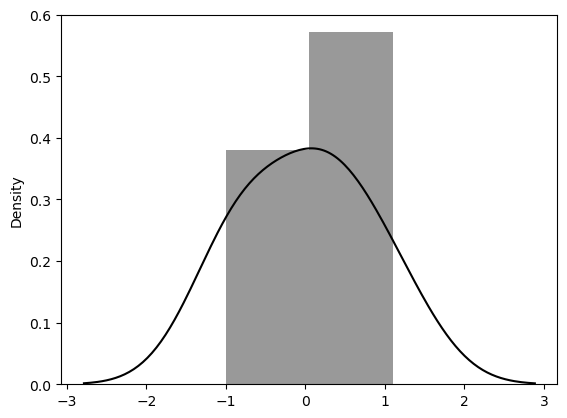

In [11]:
sns.distplot(resid, color='k')

데이터가 몇개 없지만 정규분포스럽다